# 1124作业
> 作业：从课程资源下载数据集"2021.11.24 datasets.7z"，读取'../datasets/Muller_p122_circle.csv'里的点，用2/3的样本点作为训练集，1/3为测试集，
> - 画出训练集$k=3$的决策边界
> - 求出测试集合的正确检测率

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import itertools

def kNN(train,test,k):
    dis=np.array([])
    num=0
    for i in range(len(train)):
        dis=np.append(dis,[np.linalg.norm(train[i,[0,1]]-test)])
    st=np.argsort(dis)
    for j in range(k):
        num=num+train[(np.argwhere(st==j))[0,0],2]
    if num<k/2:
        return 0
    return 1


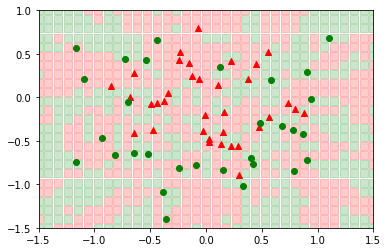

In [5]:
k=3

df=pd.read_csv('../datasets/Muller_p122_circle.csv')
tr=df.to_numpy()

trnnum=len(tr)*2//3
tstnum=len(tr)-trnnum
trn=tr[0:trnnum]
trndf=df[0:trnnum]

xx=np.linspace(-1.5,1.5,35)
yy=np.linspace(-1.5,1,25)

n=np.asarray(list(itertools.product(xx,yy)))
ze=np.zeros(len(n))

plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1)

for i in range(len(n)):
    ze[i]=kNN(trn,n[i],3)
    if ze[i]==0:
        plt.scatter(n[i,0],n[i,1],marker='s',c='g',alpha=.2,s=80)
    else:
        plt.scatter(n[i,0],n[i,1],marker='s',c='r',alpha=.2,s=80)

one=trndf.loc[trndf.cls==1]
zero=trndf.loc[trndf.cls==0]
plt.scatter(one.x,one.y,marker='^',c='r')
plt.scatter(zero.x,zero.y,marker='o',c='g')

# plt.axis('equal')
plt.show()


In [12]:
rlt=np.array([])
for u in range(tstnum):
    rlt=np.append(rlt,[kNN(trn,tr[trnnum+u,[0,1]],k)])
# print(rlt,tr[trnnum:,2])

correct_percentage=1-np.count_nonzero(rlt-tr[trnnum:,2])/tstnum

d = {'predict':rlt.astype(int),'real':tr[trnnum:,2].astype(int)}
print(pd.DataFrame(data=d))

print("准确率是{:.4%}".format(correct_percentage))

    predict  real
0         0     0
1         1     1
2         0     0
3         1     1
4         1     1
5         0     0
6         1     1
7         1     1
8         0     0
9         0     1
10        1     0
11        0     1
12        1     1
13        1     0
14        0     0
15        1     0
16        1     0
17        0     0
18        0     0
19        0     1
20        0     0
21        0     0
22        1     1
23        0     1
24        1     0
25        1     0
26        1     1
27        0     1
28        0     0
29        1     1
30        1     0
31        1     1
32        1     0
33        1     0
准确率是58.8235%


In [9]:
np.round([1.3])

array([1.])